In [12]:
#import data manipulation and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

#encoder
from sklearn import preprocessing

# Standardize the data
from sklearn.preprocessing import StandardScaler

#rebalancing target variable
from imblearn.over_sampling import RandomOverSampler

#ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#other libraries
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

#set no randomness
np.random.seed(0)

In [13]:
#load data from csv file
dataset = pd.read_csv('./../data/seattle-weather.csv')

In [14]:
#set boundaries for variables to remove outliers in data.
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3-Q1
dataset = dataset[~((dataset< (Q1-1.5*IQR)) | (dataset>(Q3+1.5*IQR))).any(axis=1)]

In [15]:
# Add a 'temp_avg' column and drop 'temp_min' and 'temp_max'
dataset['temp_avg'] = dataset[['temp_max', 'temp_min']].mean(axis=1)
dataset = dataset.drop(columns=['temp_max', 'temp_min'])
temp = dataset['weather']
dataset = dataset.drop(columns=['weather'])
dataset['weather'] = temp

In [16]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'weather'.
dataset['weather']= label_encoder.fit_transform(dataset['weather'])

In [17]:
#balancing the target variable
columns = ['precipitation', 'wind', 'temp_avg']
y = dataset['weather'] #prior target variable
X = dataset[columns]  #prior features

ros = RandomOverSampler(sampling_strategy='not majority')
X_train_balanced, y_train_balanced = ros.fit_resample(X, y) #y_train as balanced target variable

In [18]:
#preparation of train and test data for ML models
X_train,X_test,y_train,y_test = train_test_split(X_train_balanced, y_train_balanced,test_size=0.3, random_state = 1) #70 % of train data, 30 % of test data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2222, 3), (953, 3), (2222,), (953,))

In [19]:
# Standardization to achive standard normal distribution
sc = StandardScaler().fit(X_train)
# Standardize the training dataset
X_train_transformed = pd.DataFrame(sc.transform(X_train), index = X_train.index, columns = X_train.columns)
# Standardize the testing dataset
X_test_transformed = pd.DataFrame(sc.transform(X_test), index = X_test.index, columns = X_test.columns)

In [20]:
# Create Default Random Forest model
rf = RandomForestClassifier(random_state = 0)
# Create Default Random Forest model
rf.fit(X_train_transformed, y_train)
#Predict the response for test dataset
y_pred_rf = rf.predict(X_test_transformed)

#evaluation
default_rf_accuracy = accuracy_score(y_test, y_pred_rf)
default_rf_precision = precision_score(y_test, y_pred_rf, average='macro')
default_rf_recall = recall_score(y_test, y_pred_rf, average='macro')
default_rf_f1 = f1_score(y_test, y_pred_rf, average='macro')

In [21]:
#dump file
import pickle
with open("./../model/predict.pkl", "wb") as f:
    pickle.dump(rf, f)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       184
           1       0.85      0.98      0.91       191
           2       0.98      0.92      0.95       191
           3       0.98      1.00      0.99       179
           4       0.95      0.75      0.84       208

    accuracy                           0.93       953
   macro avg       0.93      0.93      0.93       953
weighted avg       0.93      0.93      0.92       953

Accuracy Score : 0.925
Precision Score : 0.93
Recall Score : 0.93
F-Score : 0.926


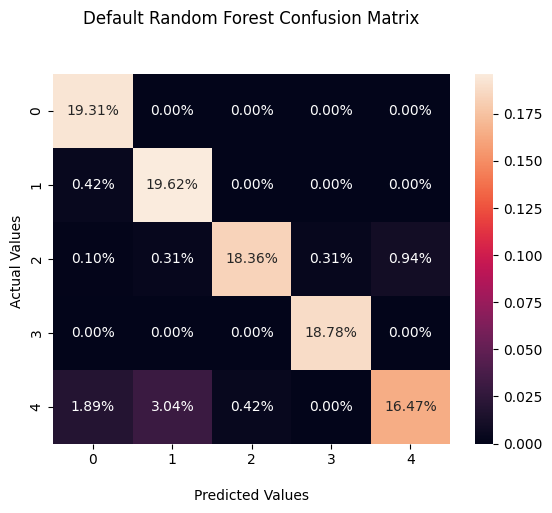

In [22]:
#evaluation of Default Random Forest: metrics pivot chart
print(classification_report(y_test, y_pred_rf))

print('Accuracy Score : ' + str(round(default_rf_accuracy,3)))
print('Precision Score : ' + str(round(default_rf_precision,3)))
print('Recall Score : ' + str(round(default_rf_recall,3)))
print('F-Score : ' + str(round(default_rf_f1,3)))

cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
ax = sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_rf), annot=True, fmt='.2%')

ax.set_title('Default Random Forest Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1','2','3','4'])
ax.yaxis.set_ticklabels(['0','1','2','3','4'])

## Display the visualization of the Confusion Matrix.
plt.show()